In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('processed/valid.csv', dtype=str)

In [3]:
image_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,   
)

---

In [4]:
valid_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    x_col='path',
    y_col='label',
    class_mode='binary',
    batch_size=64,
    target_size=(256, 256)
)

Found 3197 validated image filenames belonging to 2 classes.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((256, 256, 3)),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(rate=0.2),

    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),

    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [6]:
model.load_weights('cnn_model.keras')

In [7]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        tf.keras.metrics.TruePositives(name='True Positives'),
        tf.keras.metrics.TrueNegatives(name='True Negatives'),
        tf.keras.metrics.FalsePositives(name='False Positives'),
        tf.keras.metrics.FalseNegatives(name='False Negatives'),
        tf.keras.metrics.BinaryAccuracy(name='Binary Accuracy'),
        tf.keras.metrics.Precision(name='Precision'),
        tf.keras.metrics.Recall(name='Recall'),
    ]
)

In [9]:
eval = model.evaluate(valid_generator, return_dict=True)

50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - Binary Accuracy: 0.6692 - False Negatives: 385.8824 - False Positives: 167.3333 - Precision: 0.7169 - Recall: 0.5264 - True Negatives: 684.6078 - True Positives: 424.8039 - loss: 0.6018


In [10]:
pd.DataFrame.from_dict(eval, orient='index', columns=['value'])

,value
Binary Accuracy,0.670629
False Negatives,735.000000
False Positives,318.000000
Precision,0.714286
Recall,0.519608
True Negatives,1349.000000
True Positives,795.000000
loss,0.598483


In [11]:
cm = [
    [eval['True Positives'], eval['False Positives']],
    [eval['False Negatives'], eval['True Positives']]
]

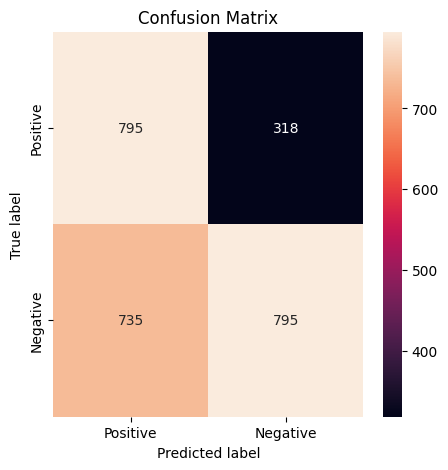

In [12]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

---

In [13]:
valid_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    x_col='path',
    y_col='label',
    class_mode='binary',
    batch_size=16,
    target_size=(224, 224)
)

Found 3197 validated image filenames belonging to 2 classes.


In [14]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg19 = VGG19(include_top=False, input_shape=(224, 224, 3), weights='imagenet', pooling='max')

inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = vgg19(inputs, training=False)
x = tf.keras.layers.Dropout(rate=0.2)(x)
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, output)

In [15]:
model.load_weights('vgg19_model.keras')

In [16]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        tf.keras.metrics.TruePositives(name='True Positives'),
        tf.keras.metrics.TrueNegatives(name='True Negatives'),
        tf.keras.metrics.FalsePositives(name='False Positives'),
        tf.keras.metrics.FalseNegatives(name='False Negatives'),
        tf.keras.metrics.BinaryAccuracy(name='Binary Accuracy'),
        tf.keras.metrics.Precision(name='Precision'),
        tf.keras.metrics.Recall(name='Recall'),
    ]
)

In [18]:
eval = model.evaluate(valid_generator, return_dict=True)

200/200 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - Binary Accuracy: 0.7123 - False Negatives: 248.4129 - False Positives: 231.6219 - Precision: 0.7101 - Recall: 0.6848 - True Negatives: 611.6020 - True Positives: 524.2537 - loss: 0.5508


In [19]:
pd.DataFrame.from_dict(eval, orient='index', columns=['value'])

,value
Binary Accuracy,0.705349
False Negatives,492.000000
False Positives,450.000000
Precision,0.697581
Recall,0.678431
True Negatives,1217.000000
True Positives,1038.000000
loss,0.563700


In [20]:
cm = [
    [eval['True Positives'], eval['False Positives']],
    [eval['False Negatives'], eval['True Positives']]
]

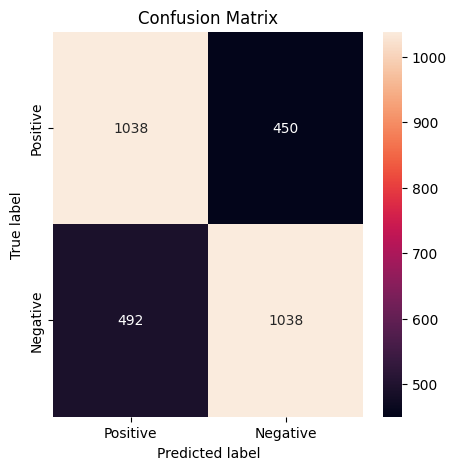

In [21]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

---

In [22]:
valid_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    x_col='path',
    y_col='label',
    class_mode='binary',
    batch_size=16,
    target_size=(224, 224)
)

Found 3197 validated image filenames belonging to 2 classes.


In [23]:
from tensorflow.keras.applications.densenet import DenseNet201

dense201 = DenseNet201(include_top=False, input_shape=(224, 224, 3), weights='imagenet', pooling="max", classes=2)

inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = dense201(inputs, training=False)
x = tf.keras.layers.Dropout(rate=0.2)(x)
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, output)

In [24]:
model.load_weights('dense201_model2.keras')

In [25]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        tf.keras.metrics.TruePositives(name='True Positives'),
        tf.keras.metrics.TrueNegatives(name='True Negatives'),
        tf.keras.metrics.FalsePositives(name='False Positives'),
        tf.keras.metrics.FalseNegatives(name='False Negatives'),
        tf.keras.metrics.BinaryAccuracy(name='Binary Accuracy'),
        tf.keras.metrics.Precision(name='Precision'),
        tf.keras.metrics.Recall(name='Recall'),
    ]
)

In [28]:
eval = model.evaluate(valid_generator, return_dict=True)

200/200 ━━━━━━━━━━━━━━━━━━━━ 143s 714ms/step - Binary Accuracy: 0.8042 - False Negatives: 214.4428 - False Positives: 101.1741 - Precision: 0.8470 - Recall: 0.7250 - True Negatives: 740.3731 - True Positives: 559.9005 - loss: 0.5124


In [29]:
pd.DataFrame.from_dict(eval, orient='index', columns=['value'])

,value
Binary Accuracy,0.809509
False Negatives,419.000000
False Positives,190.000000
Precision,0.853958
Recall,0.726144
True Negatives,1477.000000
True Positives,1111.000000
loss,0.483876


In [30]:
cm = [
    [eval['True Positives'], eval['False Positives']],
    [eval['False Negatives'], eval['True Positives']]
]

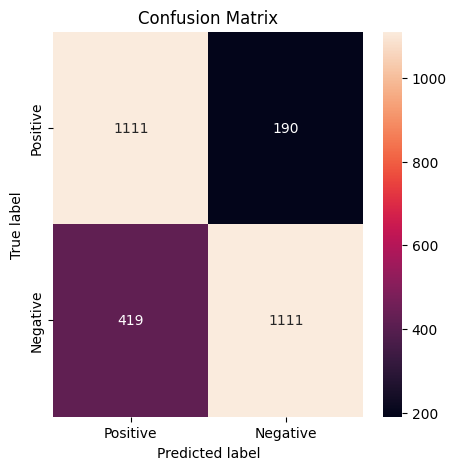

In [31]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()